# Answers to Lab 3
## 95-791 Data Mining (Fall 2021) 
### Name: Xi Yan
#### Date: Friday, November 19th, 2021



### Changing the author field and file name.

 (a) Change the `name:` field on the Jupyter Notebook to your own name.

 (b) Rename this file to "Lab3_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.



### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code

You might need to run the following commands in your terminal for all libraries to work:
    
    - conda install -c anaconda graphviz
    - conda install -c anaconda pydotplus
    - conda install -c anaconda pydot


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import pydot
import graphviz
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from dtreeviz.trees import dtreeviz
#from dtreeviz.trees import *
from sklearn.datasets import load_wine

%matplotlib inline
plt.style.use('seaborn-white')

---

### 1. Warm-up

> For Lab you might want to have your lecture slides and the ISRL textbook (An Introduction to Statistical Learning) open (Chapters 4 and 8) as you go through the exercises. 


**1)a) Load the kc_housing_data that we saw in the previous lab and print the first 5 rows.**


In [19]:
#your code here
kc_housing = pd.read_csv('kc_house_data.csv')
print(kc_housing.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

**1)b) Print out the info for your dataset. How many categorical (or not numerical) variable do we have? Are there any missing values?**

In [20]:
#your code here
kc_housing.info()
kc_housing.isnull().sum(axis=0)
kc_housing = kc_housing.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**1)d) Before moving into the next section separate your data into `X` and `y`, where your `y` is the `price`. For your `X` just use `sqft_living` and `yr_built`. Then do a 20-80 ratio (to separate into training and testing) in your split, and print out your y_test.**


In [21]:
#your code here
kc_housing = kc_housing[['price', 'sqft_living', 'yr_built']]
X = kc_housing.drop(['price'], axis=1)
y = kc_housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

### 2. Fitting Decision Trees - Regression

**2)a) We will start by creating a Decision Tree for our dataset (using the train and testing datasets we previously created). Read the documentation below and fit your data to regression decision tree.**

Scikitlearn has excellent documentation on Decision Trees [here](https://scikit-learn.org/dev/modules/tree.html#) and [here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

For this specific excersice we are going to use a [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor). Similar to other models we've implemented with scikitlearn, start by creating an object of the model class (DecisionTreeRegressor), and fit your X_train and y_train to it.


In [22]:
#your code here
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

**2)b) Print your tree as text. For this you want to use [`tree.export_text`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html). How much did your tree grow? (a lot?!) Be sure to provide feature_name so that you can interpret the tree.**

In [23]:
#your code here

r = tree.export_text(clf, feature_names=list(X_train.columns))
print(r)

|--- sqft_living <= 2259.50
|   |--- sqft_living <= 1437.50
|   |   |--- yr_built <= 1941.50
|   |   |   |--- sqft_living <= 805.00
|   |   |   |   |--- yr_built <= 1918.50
|   |   |   |   |   |--- sqft_living <= 705.00
|   |   |   |   |   |   |--- yr_built <= 1917.50
|   |   |   |   |   |   |   |--- sqft_living <= 675.00
|   |   |   |   |   |   |   |   |--- sqft_living <= 485.00
|   |   |   |   |   |   |   |   |   |--- class: 80000.0
|   |   |   |   |   |   |   |   |--- sqft_living >  485.00
|   |   |   |   |   |   |   |   |   |--- yr_built <= 1902.50
|   |   |   |   |   |   |   |   |   |   |--- class: 130000.0
|   |   |   |   |   |   |   |   |   |--- yr_built >  1902.50
|   |   |   |   |   |   |   |   |   |   |--- yr_built <= 1905.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- yr_built >  1905.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |--- sq

**2)c) Use the [`cross_val_score`] to report your mean CV score, and its standard deviation. Use a k=10. How good is this score?** 

In [24]:
#your code here
CV_error_clf = np.mean(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
CV_error_clf_sd = np.std(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(np.abs(CV_error_clf))
print(CV_error_clf_sd)

# The CV score is pretty high actually.

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


99951343498.60919
6003120579.806877


**2)d) Repeat 2)a) but limit your tree to `max_leaf_nodes=5`. Print the mean CV score for this new model. Did your model improve?**


In [25]:
#your code here
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf = clf.fit(X_train, y_train)
CV_error_clf = np.mean(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
CV_error_clf_sd = np.std(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(np.abs(CV_error_clf))
print(CV_error_clf_sd)

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


81719550357.31082
9191772004.510365


Both the MSE and R-squared improved.

---

# Visualizing Decision Trees

In this section we will look at different way of plotting our Decision Trees. Please continue using the model you already trained.


**3)a)The first and easiest way to visualize our Decision Tree is with [tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) from sckitlearn.**

plot_tree = tree.plot_tree(your_model, feature_names=[], filled =True)

Go ahead and try this function on your model!

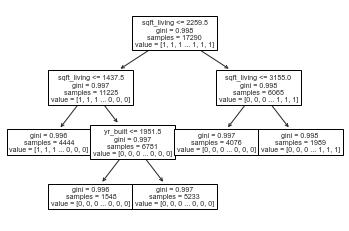

In [26]:
#your code here
plot_tree = tree.plot_tree(clf, feature_names=['sqft_living', 'yr_built'], filled=True)

**3)b)Guess what? You can export the previous tree plot to an image. Follow the steps below to achieve it.**

- We first use [tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) from sckitlearn to obtain the text data of our tree and export it to a graphviz format.

> tree_data = tree.export_graphviz(your_tree, out_file=None, 
                                feature_names=[],  
                                filled=True)
                                
- We use [graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) - a graph-drawing software - to draw our tree and [format](https://graphviz.readthedocs.io/en/stable/api.html?highlight=source#source) it into an image type file (e.g. 'png').


> graph = graphviz.Source(tree_data, format="png") 

> graph #you can view the graph created

- We render the graph! This prints out a image type file.

> graph.render("name_your_file.png")

Go ahead and try this on your model!

In [27]:
#prepare tree_data
#your code here
tree_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(X_train.columns),
                                filled=True)
#source it with graphviz and view the graph
#your code here
graph = graphviz.Source(tree_data, format="png")

In [28]:
#print out graph to png format
#your code here
graph.render("./clf_img.png")

'./clf_img.png.png'

**3)c)We are going try one more python library that can help us draw and understand our trees. The [dtreesviz](https://github.com/parrt/dtreeviz) is a fairly new library, but its based off scikit-learn. Why do you think this might be useful?**
Look at the code below and fill in the missing parts.



In [29]:
viz = dtreeviz(clf, X_train, y_train,
               target_name='price',
               feature_names=['sqft_living', 'yr_built'],
               title='tree',
               fontname='Arial',
               title_fontsize=14,
               colors = {"title":"darkblue"},
               scale=2)

viz

# Not able to run this

IndexError: list index out of range

**3)d)Let's now repeat the process with all the variables in your dataset. You'll need to split into training and testing again, and re-train your Regression tree.** **Do not include `date` as a feature.

In [37]:
#your code here
kc_housing = pd.read_csv('kc_house_data.csv')
kc_housing = kc_housing.drop(['id'], axis=1)
kc_housing = kc_housing.drop(['date'], axis=1)


In [38]:
#re-train your tree
X = kc_housing.drop(['price'], axis=1)
y = kc_housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#your code here
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf = clf.fit(X_train, y_train)

**3)e)Use one of the methods from a) to c), to plot your decision tree.**

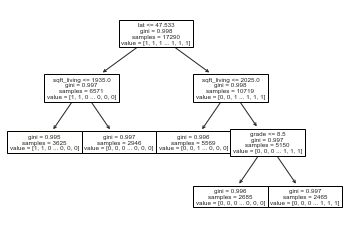

In [40]:
#your code here
plot_tree = tree.plot_tree(clf, feature_names=list(X_train.columns.values), filled=True)

**3)f)Now that you have a single decision Tree, let's try a [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)! Import the package below and follow the instructions.**

* Create a RandomForestRegressor object with max_depth=30 and a random_state=1
* fit your model with your train dataset
* From here you can make predictions and get the scores for both your train and test datasets.
* Use the .score on your test dataset

What is the $R^2$ of your test? Is it better than your previous decision tree?


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regr = RandomForestRegressor(max_depth=30, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=1)

RandomForestRegressor(max_depth=30, random_state=1)

In [46]:
y_test_pred = regr.predict(X_test)
mean_squared_error(y_test, y_test_pred)
y_train_pred = regr.predict(X_train)
mean_squared_error(y_train, y_train_pred)
print('Train R^2 is', regr.score(X_train, y_train))
print('Test R^2 is', regr.score(X_test, y_test))



Train R^2 is 0.9821353433486197
Test R^2 is 0.8622630072695647


**3)g)In class we mentioned that RF lost interpretability, but we are able to calculate feature importances from them. There were two approaches we discussed for this. Take a look at these two approaches [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html). Follow the steps below.**

* Obtain the feature importances from your RF (3)f))
    * These were already calculated for you, you just need to extract them: rf.feature_importances_
* Create a dataframe of features in one column, and feature importances in a second column.
* Plot the features vs importances.
    * This can be as simple as a seaborn barplot. You can even go the extra mile ordering the results.

In [57]:
#create dataframe
#your code here
imp = regr.feature_importances_
df = pd.DataFrame({'feature name':list(X_train.columns.values), 'prediction result':imp})

<AxesSubplot:xlabel='prediction result', ylabel='feature name'>

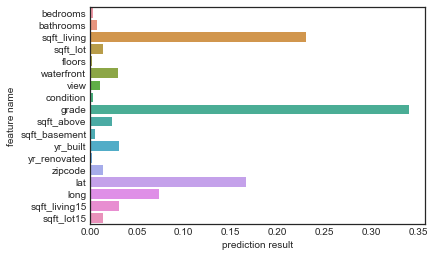

In [62]:
#create plot
#your code here
sns.barplot(data=df,x=df['prediction result'],y=df['feature name'])

--- 

# Classification Trees

For classification trees we need another dataset. In this case we can use the wine dataset (from scikit-learn, we have used it before). You can also choose to use another dataset of your liking.

**4)a)Load your drugs dataset from Homework 2. Convert your categorical varibles into numerical**

In [86]:
#your code here
df2 = pd.read_csv('drug200.csv')
df2['Sex'] = pd.factorize(df2['Sex'])[0]
df2['BP'] = pd.factorize(df2['BP'])[0]
df2['Cholesterol'] = pd.factorize(df2['Cholesterol'])[0]
#df2['Drug'] = pd.factorize(df2['Drug'])[0]
df2.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


**4)b)Split into training and testing datasets, with a 70-30 ratio, and random_state=7.**

In [87]:
#your code here
X = df2.drop(['Drug'], axis=1)
y = df2['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

**4)c)We now need to train a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Create a DecisionTreeClassifier object and then fit your train dataset.**

In [96]:
#your code here
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

**4)d)How well did your Decision Tree Classifier perform? Print out its clasisfication report.**

In [97]:
#your code here
y_drug_pred = clf.predict(X_test)
print(classification_report(y_test, y_drug_pred))

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        29
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.86      0.92         7
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.92      0.96        13

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



**4)e)Use tree.plot_tree (section 3) to visualize your tree.**

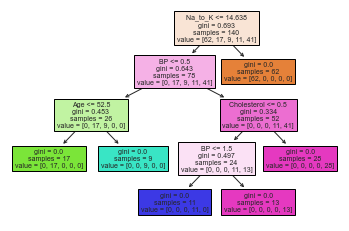

In [98]:
#your code here
plot_tree = tree.plot_tree(clf, feature_names=list(X_train.columns.values), filled=True)

**4)e) Now that you have a single decision Tree, let's try a [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)! Import the package below and follow the instructions.**

* Create a RandomForestClassifier object with n_estimators=500 and a random_state=1
* fit your model with your train dataset
* From here you can make predictions and get the scores for both your train and test datasets.
* Use the .score on your test dataset

What is the test accuracy?


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
#your code here
regr = RandomForestClassifier(max_depth=500, random_state=1)
regr.fit(X_train, y_train)

RandomForestClassifier(max_depth=500, random_state=1)

**4)f) Print a classification report with your previous RandomForest Classifier. This will allow you to see how well it predicted each class.**

In [102]:
#your code here
y_drug_pred = clf.predict(X_test)
print(classification_report(y_test, y_drug_pred))

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        29
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.86      0.92         7
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.92      0.96        13

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



**4)g)Repeat the steps from 3)g) to plot the feature importance for this model. What is your most important feature?**

In [103]:
#your code here
imp = regr.feature_importances_
df = pd.DataFrame({'feature name':list(X_train.columns.values), 'prediction result':imp})

<AxesSubplot:xlabel='prediction result', ylabel='feature name'>

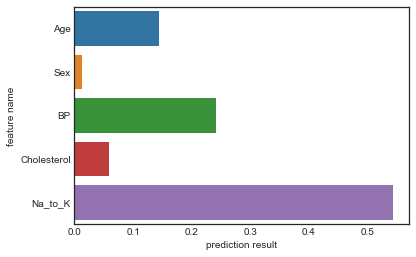

In [104]:
#create plot
#your code here
sns.barplot(data=df,x=df['prediction result'],y=df['feature name'])

---

### END OF LAB 3!
